In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

In [139]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/finaldata.csv')

In [140]:
df.head()


,data,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,actual_time,osrm_time,factor,segment_actual_time,...,creation_weekday,creation_month,start_hour,start_weekday,start_month,actual_vs_osrm_time_ratio,segment_actual_vs_osrm_ratio,delivery_efficiency,avg_segment_actual_time_by_route,avg_segment_osrm_time_by_route
0,training,Carting,IND388121AAA,IND388620AAB,86.0,True,14.0,11.0,1.272727,14.0,...,3,9,3,3,9,1.272612,1.272612,0.127905,24.507724,10.550283
1,training,Carting,IND388121AAA,IND388620AAB,86.0,True,24.0,20.0,1.200000,10.0,...,3,9,3,3,9,1.199940,1.110988,0.232555,24.507724,10.550283
2,training,Carting,IND388121AAA,IND388620AAB,86.0,True,40.0,28.0,1.428571,16.0,...,3,9,3,3,9,1.428520,2.285388,0.325578,24.507724,10.550283
3,training,Carting,IND388121AAA,IND388620AAB,86.0,True,62.0,40.0,1.550000,21.0,...,3,9,3,3,9,1.549961,1.749854,0.465111,24.507724,10.550283
4,training,Carting,IND388121AAA,IND388620AAB,86.0,False,68.0,44.0,1.545455,6.0,...,3,9,3,3,9,1.545419,1.199760,0.511622,24.507724,10.550283


In [141]:
# Step 2: Label encode the required columns

label_cols = ['data', 'route_type', 'is_cutoff']

# Apply label encoding
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [142]:
df.head()

,data,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,actual_time,osrm_time,factor,segment_actual_time,...,creation_weekday,creation_month,start_hour,start_weekday,start_month,actual_vs_osrm_time_ratio,segment_actual_vs_osrm_ratio,delivery_efficiency,avg_segment_actual_time_by_route,avg_segment_osrm_time_by_route
0,1,0,IND388121AAA,IND388620AAB,86.0,1,14.0,11.0,1.272727,14.0,...,3,9,3,3,9,1.272612,1.272612,0.127905,24.507724,10.550283
1,1,0,IND388121AAA,IND388620AAB,86.0,1,24.0,20.0,1.200000,10.0,...,3,9,3,3,9,1.199940,1.110988,0.232555,24.507724,10.550283
2,1,0,IND388121AAA,IND388620AAB,86.0,1,40.0,28.0,1.428571,16.0,...,3,9,3,3,9,1.428520,2.285388,0.325578,24.507724,10.550283
3,1,0,IND388121AAA,IND388620AAB,86.0,1,62.0,40.0,1.550000,21.0,...,3,9,3,3,9,1.549961,1.749854,0.465111,24.507724,10.550283
4,1,0,IND388121AAA,IND388620AAB,86.0,0,68.0,44.0,1.545455,6.0,...,3,9,3,3,9,1.545419,1.199760,0.511622,24.507724,10.550283


In [143]:
le_source = LabelEncoder()
le_dest = LabelEncoder()

df['source_center'] = le_source.fit_transform(df['source_center'])
df['destination_center'] = le_dest.fit_transform(df['destination_center'])

# Optional: see the mappings
print(dict(zip(le_source.classes_, le_source.transform(le_source.classes_))))
print(dict(zip(le_dest.classes_, le_dest.transform(le_dest.classes_))))


{'IND000000AAL': np.int64(0), 'IND000000AAQ': np.int64(1), 'IND000000AAS': np.int64(2), 'IND000000AAZ': np.int64(3), 'IND000000ABA': np.int64(4), 'IND000000ABD': np.int64(5), 'IND000000ABG': np.int64(6), 'IND000000ACA': np.int64(7), 'IND000000ACB': np.int64(8), 'IND000000ACK': np.int64(9), 'IND000000ACN': np.int64(10), 'IND000000ACT': np.int64(11), 'IND000000ADM': np.int64(12), 'IND000000ADV': np.int64(13), 'IND000000AEL': np.int64(14), 'IND000000AEM': np.int64(15), 'IND000000AET': np.int64(16), 'IND000000AFF': np.int64(17), 'IND000000AFG': np.int64(18), 'IND000000AFJ': np.int64(19), 'IND000000AFR': np.int64(20), 'IND000000AFT': np.int64(21), 'IND110014AAA': np.int64(22), 'IND110020AAB': np.int64(23), 'IND110024AAA': np.int64(24), 'IND110030AAD': np.int64(25), 'IND110035AAC': np.int64(26), 'IND110037AAK': np.int64(27), 'IND110037AAM': np.int64(28), 'IND110039AAA': np.int64(29), 'IND110043AAA': np.int64(30), 'IND110043AAC': np.int64(31), 'IND110044AAB': np.int64(32), 'IND110052AAA': np.

In [144]:
df.head()

,data,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,actual_time,osrm_time,factor,segment_actual_time,...,creation_weekday,creation_month,start_hour,start_weekday,start_month,actual_vs_osrm_time_ratio,segment_actual_vs_osrm_ratio,delivery_efficiency,avg_segment_actual_time_by_route,avg_segment_osrm_time_by_route
0,1,0,492,486,86.0,1,14.0,11.0,1.272727,14.0,...,3,9,3,3,9,1.272612,1.272612,0.127905,24.507724,10.550283
1,1,0,492,486,86.0,1,24.0,20.0,1.200000,10.0,...,3,9,3,3,9,1.199940,1.110988,0.232555,24.507724,10.550283
2,1,0,492,486,86.0,1,40.0,28.0,1.428571,16.0,...,3,9,3,3,9,1.428520,2.285388,0.325578,24.507724,10.550283
3,1,0,492,486,86.0,1,62.0,40.0,1.550000,21.0,...,3,9,3,3,9,1.549961,1.749854,0.465111,24.507724,10.550283
4,1,0,492,486,86.0,0,68.0,44.0,1.545455,6.0,...,3,9,3,3,9,1.545419,1.199760,0.511622,24.507724,10.550283


In [145]:
df.shape

(144316, 23)

In [146]:
# Separate features and target
X = df.drop(columns=['actual_time'])  # drop the target
y = df['actual_time']


In [147]:
# Filter train and test data based on 'data' column, then drop 'data' column
X_train = X[df['data'] == 1].drop(columns=['data'])
X_test = X[df['data'] == 0].drop(columns=['data'])
y_train = y[df['data'] == 1]
y_test = y[df['data'] == 0]




In [148]:
X_train.head()


,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,osrm_time,factor,segment_actual_time,segment_osrm_time,segment_factor,...,creation_weekday,creation_month,start_hour,start_weekday,start_month,actual_vs_osrm_time_ratio,segment_actual_vs_osrm_ratio,delivery_efficiency,avg_segment_actual_time_by_route,avg_segment_osrm_time_by_route
0,0,492,486,86.0,1,11.0,1.272727,14.0,11.0,1.272727,...,3,9,3,3,9,1.272612,1.272612,0.127905,24.507724,10.550283
1,0,492,486,86.0,1,20.0,1.200000,10.0,9.0,1.111111,...,3,9,3,3,9,1.199940,1.110988,0.232555,24.507724,10.550283
2,0,492,486,86.0,1,28.0,1.428571,16.0,7.0,2.285714,...,3,9,3,3,9,1.428520,2.285388,0.325578,24.507724,10.550283
3,0,492,486,86.0,1,40.0,1.550000,21.0,12.0,1.750000,...,3,9,3,3,9,1.549961,1.749854,0.465111,24.507724,10.550283
4,0,492,486,86.0,0,44.0,1.545455,6.0,5.0,1.200000,...,3,9,3,3,9,1.545419,1.199760,0.511622,24.507724,10.550283


In [149]:
# Normalize the data (important for neural networks)
scaler = StandardScaler()
# Select only numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [160]:
# Apply scaling only on numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


In [216]:
# Build a simple regression model using Keras
from tensorflow.keras.layers import Dropout # Import Dropout layer

model = Sequential()
model.add(Input(shape=(X_train_scaled .shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [217]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [221]:
# Train the model
history=model.fit(X_train_scaled , y_train, epochs=15, validation_split=0.2, batch_size=16)

Epoch 1/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 248.9593 - mae: 8.0814 - val_loss: 349.7193 - val_mae: 8.2545
Epoch 2/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 275.2527 - mae: 8.0437 - val_loss: 291.3580 - val_mae: 7.3138
Epoch 3/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 244.8866 - mae: 7.9358 - val_loss: 253.3723 - val_mae: 6.8827
Epoch 4/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 286.9648 - mae: 7.6191 - val_loss: 199.2372 - val_mae: 6.3903
Epoch 5/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 266.0670 - mae: 7.5870 - val_loss: 140.4663 - val_mae: 6.4697
Epoch 6/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 219.3469 - mae: 7.2445 - val_loss: 129.6566 - val_mae: 5.9023
Epoch 7/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 222.1792 - mae: 7.1005 - val_loss: 236.3769 - val_mae: 8.4710
Epoch 8/15
5232/5232 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 188.7775 - mae: 6.9382 - val_loss: 158.4470 - val_mae: 6.5906


In [222]:
print("Train MAE history:", history.history['mae'])
print("Validation MAE history:", history.history['val_mae'])


Train MAE history: [7.936241626739502, 7.766192436218262, 7.926573276519775, 7.61018705368042, 7.453436374664307, 7.301536560058594, 7.116827487945557, 7.010977745056152, 7.099864959716797, 6.835459232330322, 6.789730072021484, 6.800923824310303, 6.532901287078857, 6.606273651123047, 6.5237531661987305]
Validation MAE history: [8.254453659057617, 7.313781261444092, 6.88265323638916, 6.390347957611084, 6.4697136878967285, 5.9023237228393555, 8.471038818359375, 6.590605735778809, 8.464046478271484, 7.037903308868408, 6.180380344390869, 5.474427223205566, 5.249296188354492, 8.022168159484863, 7.28723669052124]


In [223]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

1241/1241 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 216.0732 - mae: 7.6444
Test Loss: 234.67556762695312
Test MAE: 7.6893086433410645


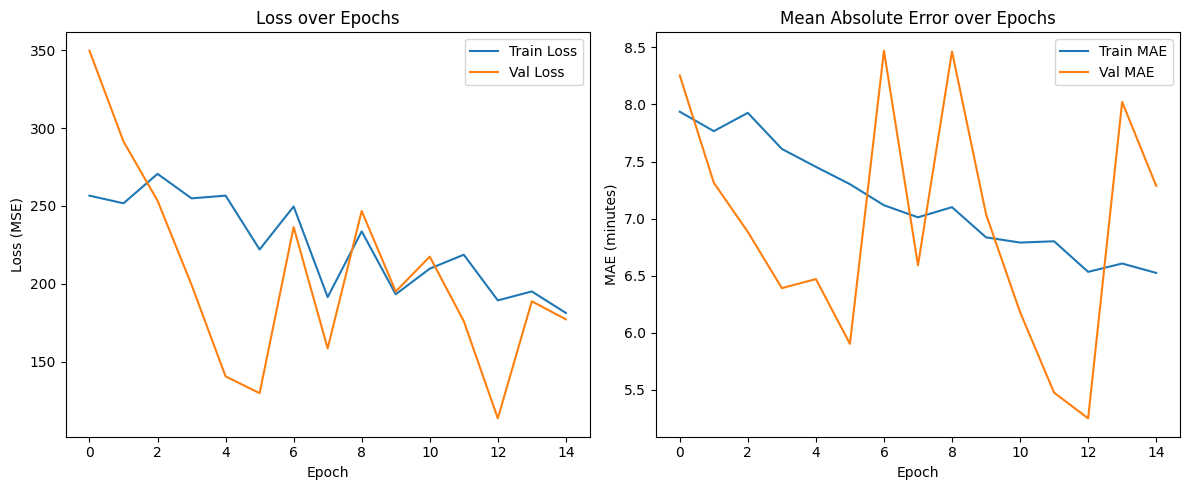

In [224]:
import matplotlib.pyplot as plt


# Plot loss and MAE
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE (minutes)')
plt.legend()

plt.tight_layout()
plt.show()


In [225]:
# Predict
y_pred = model.predict(X_test_scaled).flatten()

1241/1241 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [226]:
# Compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison_df['Error'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])
print(comparison_df.head())

   Actual  Predicted      Error
0    20.0  28.986328   8.986328
1    40.0  45.861206   5.861206
2    51.0  61.788010  10.788010
3    41.0  47.852661   6.852661
4    61.0  71.164886  10.164886


In [227]:
comparison_df['Relative_Error'] = abs(comparison_df['Predicted'] - comparison_df['Actual']) / comparison_df['Actual']
comparison_df['Correct'] = comparison_df['Relative_Error'] <= 0.20

accuracy = comparison_df['Correct'].mean() * 100
print(f"Relative Accuracy (±20% of actual): {accuracy:.2f}%")


Relative Accuracy (±20% of actual): 93.72%


In [228]:
# Mark as "Correct" if prediction is within ±20 units of actual value
threshold = 20  # You can change this
comparison_df['Correct'] = comparison_df['Error'] <= threshold

# Count how many are correct vs incorrect
print(comparison_df['Correct'].value_counts())


Correct
True     37061
False     2623
Name: count, dtype: int64
